### This notebook shows EDA of important features on Primary Care Shortage
### 3 parts:
#### A) Data Cleaning
#### B) Exploratory Data Analysis (EDA)
#### C) Impacts of Healthcare Services Types, Poverty Level on Primary Care Shortage Scores & Ratio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
#la_facility_mua = pd.read_csv('../input/la-final-data-2/la_facility_mua.csv')
la_facility_pcua = pd.read_csv('../input/la-final-data-2/la_facility_pcua.csv')

In [3]:
la_facility_pcua.head(5)

,source,cat1,cat2,org_name,Name,addrln1,city,state,post_id,description,...,HPSA_Updated_Time,HPSA_PctPoverty,HPSA_Shortage,HPSA_Ratio,HPSA_CountPoverty,HPSA_Pop_100Poverty,HPSA_Pop_200Poverty,HPSA_Pct_100Poverty,HPSA_Pct_200Poverty,HPSA_UnitCount
0,211,Social Services,Children and Family Services,neweconomicsforwomen.org,New Economics For Women - Familysource Center ...,501 S. Bixel St.,Los Angeles,CA,56652,The agency is an economic development organiza...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,22.4,24.58,22665:1,82904.0,18583.0,43222.0,22.415083,52.135000,21.0
2,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,22.4,24.58,22665:1,82904.0,18583.0,43222.0,22.415083,52.135000,21.0
3,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,29.0,21.85,10640:1,90233.0,25368.0,56536.0,28.113883,62.655569,20.0
4,211,Social Services,Children and Family Services,NaN,Shields For Families Inc - Compton Family Pres...,215 Acacia Ave.,Compton,CA,621,"The agency provides child abuse services, dome...",...,1.514333e+12,29.0,21.85,10640:1,90233.0,25368.0,56536.0,28.113883,62.655569,20.0


### A) Data Cleaning
#### i) Drop useless columns (with only one unique value)
#### ii) Fill Null values mode/median
#### iii) Correct individual values in some features

In [4]:
#la_facility_mua.drop(['use_type','facility_number_of_beds','state'], axis=1, inplace=True)
la_facility_pcua.drop(['use_type','facility_number_of_beds','state'], axis=1, inplace=True)

In [5]:
la_facility_pcua['source'].fillna('LA County Department of Children and Family Services', inplace=True)

la_facility_pcua['HPSA_RuralStatus'].fillna('Rural', inplace=True)
la_facility_pcua['HPSA_Subtype'].fillna('Hpsa Population', inplace=True) #mode
la_facility_pcua['HPSA_Score'].fillna(13.0, inplace=True) #mode,median 
la_facility_pcua['HPSA_PctPoverty'].fillna(26.0, inplace=True) #median
la_facility_pcua['HPSA_Ratio'] = la_facility_pcua['HPSA_Ratio'].str.replace(':1','')
la_facility_pcua['HPSA_Ratio'].fillna('5042', inplace=True) #mode
la_facility_pcua['HPSA_Ratio'] = la_facility_pcua['HPSA_Ratio'].astype('int64')
la_facility_pcua['HPSA_Pct_100Poverty'].fillna(26.42995285, inplace=True) #median
la_facility_pcua['HPSA_Pct_200Poverty'].fillna(56.74644013, inplace=True) #median
la_facility_pcua['license_category'].fillna('Community Clinic', inplace=True) #mode

la_facility_pcua['HPSA_Pct_100Poverty'] = la_facility_pcua['HPSA_Pct_100Poverty'].round(6)
la_facility_pcua['HPSA_Pct_200Poverty'] = la_facility_pcua['HPSA_Pct_200Poverty'].round(6)

In [6]:
la_facility_pcua['source'] = la_facility_pcua['source'].str.replace('211.0', '211')
la_facility_pcua['Zip Code'] = la_facility_pcua['Zip Code'].astype('int32')
la_facility_pcua = la_facility_pcua[la_facility_pcua['Zip Code']!=0]
la_facility_pcua['cat1+2'] = la_facility_pcua['cat2'].astype('str')+'_'+la_facility_pcua['cat1'].astype('str')

la_facility_pcua['city'] = la_facility_pcua['city'].str.replace('Signal Hill ', 'Signal Hill')
la_facility_pcua['city'] = la_facility_pcua['city'].str.replace(' Hollywoo', ' Hollywood').str.replace(' Hollywoodd', ' Hollywood')
la_facility_pcua['city'] = la_facility_pcua['city'].str.replace('Los Angeles,', 'Los Angeles').str.replace('Los Angeles ', 'Los Angeles').str.replace('Los Angelels','Los Angeles').str.replace('Los  Angeles', 'Los Angeles').str.replace(' Los Angeles', 'Los Angeles')
la_facility_pcua['city'] = la_facility_pcua['city'].str.replace('Industry', 'City of Industry').str.replace('City of Industry ', 'City of Industry').str.replace('City of City of Industry', 'City of Industry')
la_facility_pcua['city'] = la_facility_pcua['city'].str.replace('Bell', 'Bell Gardens').str.replace('Bell Gardens Gardens', 'Bell Gardens')

In [8]:
la_facility_pcua.columns

Index(['source', 'cat1', 'cat2', 'org_name', 'Name', 'addrln1', 'city',
       'post_id', 'description', 'link', 'latitude', 'longitude',
       'date_updated', 'Zip Code', 'facility_name', 'facility_description',
       'facility_status', 'license_category', 'facility_er_service',
       'facility_address_1', 'HPSA_RuralStatus', 'HPSA_MSSA_Name_1',
       'HPSA_MSSA_Name_2', 'HPSA_Subtype', 'HPSA_FTE', 'HPSA_Score',
       'HPSA_Designated_Time', 'HPSA_Updated_Time', 'HPSA_PctPoverty',
       'HPSA_Shortage', 'HPSA_Ratio', 'HPSA_CountPoverty',
       'HPSA_Pop_100Poverty', 'HPSA_Pop_200Poverty', 'HPSA_Pct_100Poverty',
       'HPSA_Pct_200Poverty', 'HPSA_UnitCount', 'cat1+2'],
      dtype='object')

### SideNote: 
### 1) HPSA_Shortage: Higher Value -> Higher Primary Care Shortage
### 2) HPSA_Score (0-25): Higher Value -> Higher Primary Care Shortage
### 3) HPSA_Ratio: Lower Value -> higher shortage
### 4) HPSA_PctPoverty: Lower Percent -> Higher Poverty
### 5a) HPSA_Pct_100Poverty = Poverty Level Under 100%Poverty Threshold
### 5b) HPSA_Pct_100Poverty: Lower Percent -> Higher Poverty 
### 6a) HPSA_Pct_200Poverty = Poverty Level Under 200%Poverty Threshold
### 6b) HPSA_Pct_200Poverty: Lower Percent -> Higher Poverty 

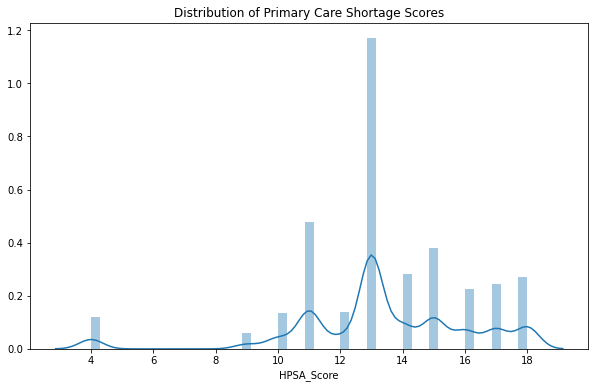

In [9]:
plt.figure(figsize = (10, 6))
sns.distplot(la_facility_pcua['HPSA_Score']);
plt.title('Distribution of Primary Care Shortage Scores');

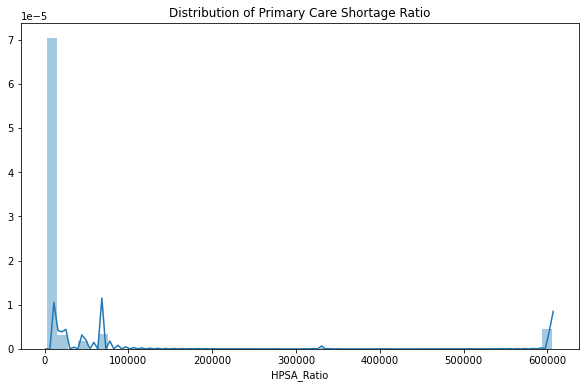

In [10]:
plt.figure(figsize = (10, 6))
sns.distplot(la_facility_pcua['HPSA_Ratio']);
plt.title('Distribution of Primary Care Shortage Ratio');

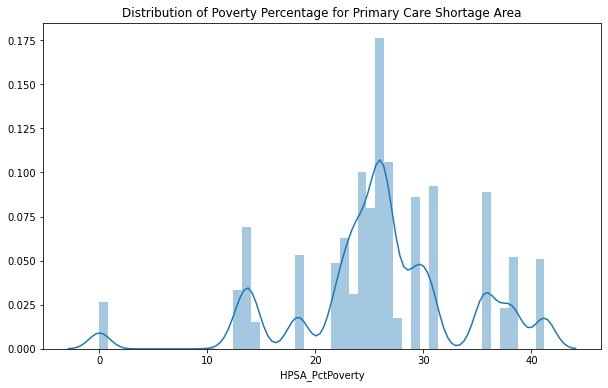

In [11]:
plt.figure(figsize = (10, 6))
sns.distplot(la_facility_pcua['HPSA_PctPoverty']);
plt.title('Distribution of Poverty Percentage for Primary Care Shortage Area');

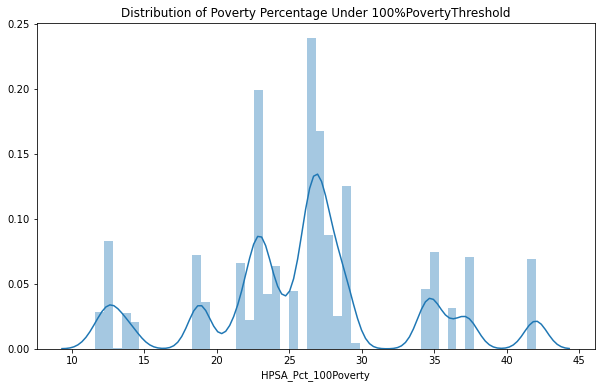

In [12]:
plt.figure(figsize = (10, 6))
sns.distplot(la_facility_pcua['HPSA_Pct_100Poverty']);
plt.title('Distribution of Poverty Percentage Under 100%PovertyThreshold');

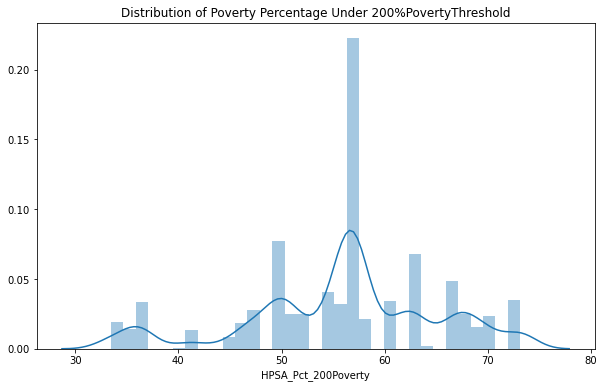

In [13]:
plt.figure(figsize = (10, 6))
sns.distplot(la_facility_pcua['HPSA_Pct_200Poverty']);
plt.title('Distribution of Poverty Percentage Under 200%PovertyThreshold');

### B) Frequency Counting EDA
### 1) HPSA_Score (0-25): Higher Value -> Higher Primary Care Shortage
#### i) top 3 most frequent values: 13.0, 11.0, 15.0 (all > 10.0)
#### -> Most areas have High Primary Care Shortage Problems
#### ii) Highest Score: 18.0 (Highest Shortage)
#### iii) Lowest Score: 4.0 (Lowest Shortage)

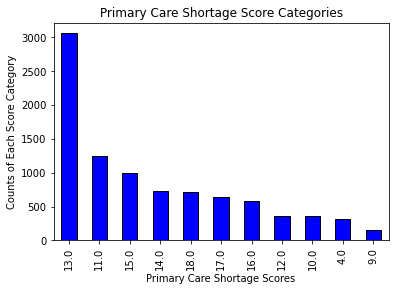

In [14]:
# Frequency Counting for Primary Care Shortage Score
la_facility_pcua['HPSA_Score'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Primary Care Shortage Score Categories'); plt.xlabel("Primary Care Shortage Scores"); plt.ylabel('Counts of Each Score Category');

### 2) HPSA_Ratio: Lower Value -> higher shortage
#### top 5 most frequent values: 

i) 5042

ii) 6565

iii) 605309

iv) 7657

v) 9632

#### Lowest Ratios (Highest Shortage): 3398, 3526, 4861, 5042, 5387 
#### Highest Ratios (Lowest Shortage): 605309, 331500, 67856, 46340, 46326
### Results Complement with Score Analysis above: 
### Most Areas have Shortage Problems

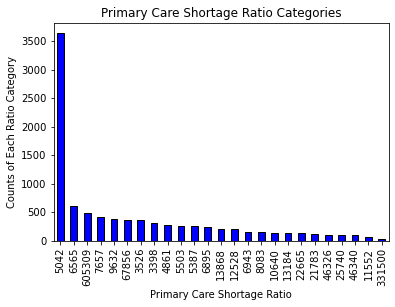

In [15]:
# Frequency Counting for Primary Care Shortage Ratio
la_facility_pcua['HPSA_Ratio'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Primary Care Shortage Ratio Categories'); plt.xlabel("Primary Care Shortage Ratio"); plt.ylabel('Counts of Each Ratio Category');

### 3) HPSA_PctPoverty: Lower Percent -> Higher Poverty
### All values < 50.0% (All Primary Care Shortage Areas have High Poverty Level)
#### i) Lowest Percent (Highest Poverty): 0.0, 10.7, 12.6, 12.9, 13.8
#### ii) Highest Percent (Lowest Poverty): 41.2, 38.4, 38.0, 37.5, 35.8  

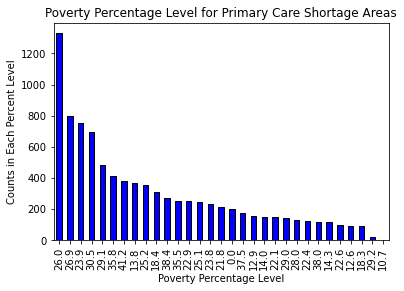

In [16]:
# Frequency Counting for Poverty Percentage Level for Primary Care Shortage Areas
la_facility_pcua['HPSA_PctPoverty'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Poverty Percentage Level for Primary Care Shortage Areas'); plt.xlabel("Poverty Percentage Level"); plt.ylabel('Counts in Each Percent Level');

### 4) HPSA_Pct_100Poverty = Poverty Level Under 100%Poverty Threshold
### HPSA_Pct_100Poverty: Lower Percent -> Higher Poverty
All values < 50.0% (All Primary Care Shortage Areas have High Poverty Level)

#### i) Lowest Percent (Highest Poverty):        
    
-> 11.633699, 12.521134, 12.660380, 13.005632, 13.740978

#### ii) Highest Percent (Lowest Poverty):

-> 42.002689, 37.299925, 37.249997, 35.940386, 34.786329     

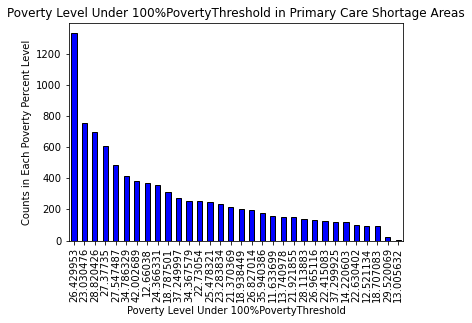

In [17]:
# Frequency Counting for % of Population Under 100%PovertyLevel in Primary Care Shortage Areas
la_facility_pcua['HPSA_Pct_100Poverty'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Poverty Level Under 100%PovertyThreshold in Primary Care Shortage Areas'); plt.xlabel("Poverty Level Under 100%PovertyThreshold"); plt.ylabel('Counts in Each Poverty Percent Level');

### 5) HPSA_Pct_200Poverty = Poverty Level Under 200%Poverty Threshold
### HPSA_Pct_200Poverty: Lower Percent -> Higher Poverty
#### i) Lowest Percent (Highest Poverty):        

-> 33.458599, 33.553991, 35.837066, 36.273088, 40.373784     
#### ii) Highest Percent (Lowest Poverty):

-> 73.144224, 69.969112, 68.960852, 67.758396, 66.847288    

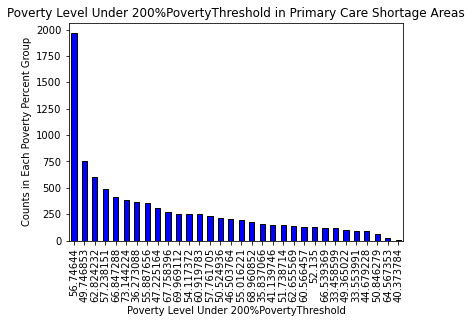

In [18]:
# Frequency Counting for % of Population Under 200%PovertyLevel in Primary Care Shortage Areas
la_facility_pcua['HPSA_Pct_200Poverty'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Poverty Level Under 200%PovertyThreshold in Primary Care Shortage Areas'); plt.xlabel("Poverty Level Under 200%PovertyThreshold"); plt.ylabel('Counts in Each Poverty Percent Group');

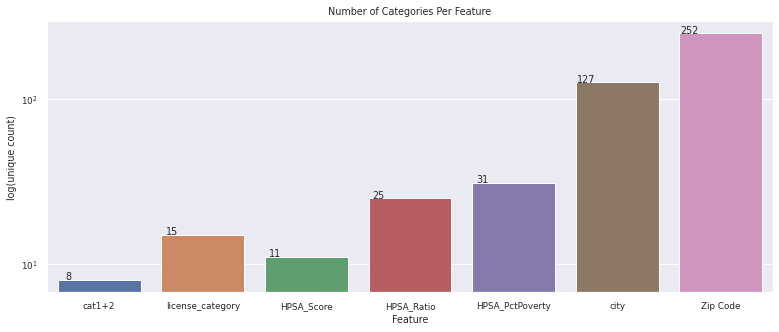

In [19]:
# Important Categorical Variables

plt.figure(figsize=(13, 5))
cols = ['cat1+2','license_category', 'HPSA_Score', 'HPSA_Ratio',
        'HPSA_PctPoverty', 'city', 'Zip Code']
uniques = [len(la_facility_pcua[col].unique()) for col in cols]
sns.set(font_scale=0.8)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of Categories Per Feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/8.,
            height + 0.07,
            uniq,
            ha="center")

### 6) Top 5 Most Available Combined Healthcare & Community Services
i) Children and Family Services_Social Services          

ii) Substance Abuse Programs_Health and Mental Health   

iii) Mental Health Counseling_Health and Mental Health      

iv) Health Screening and Testing_Health and Mental Health    

v) Domestic Violence Services_Social Services                

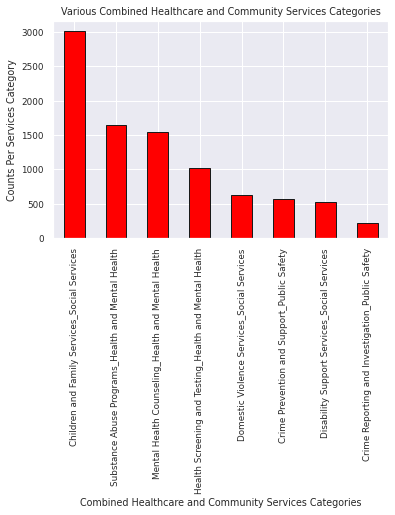

In [20]:
# Frequency Counting for cat1+2
la_facility_pcua['cat1+2'].value_counts().plot.bar(color = 'red', edgecolor = 'k');
plt.title('Various Combined Healthcare and Community Services Categories'); plt.xlabel('Combined Healthcare and Community Services Categories'); plt.ylabel('Counts Per Services Category');

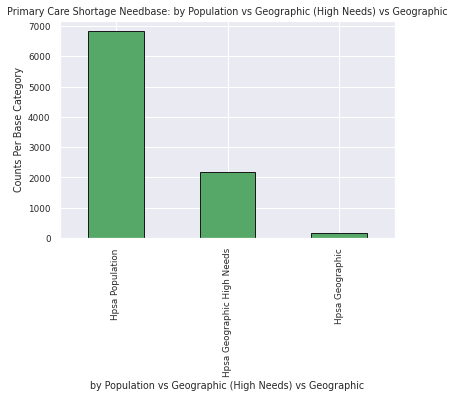

In [21]:
# Frequency Counting for Primary Care Shortage Needbase: by Population vs Geographic (High Needs) vs Geographic
la_facility_pcua['HPSA_Subtype'].value_counts().plot.bar(color = 'g', edgecolor = 'k');
plt.title('Primary Care Shortage Needbase: by Population vs Geographic (High Needs) vs Geographic'); plt.xlabel('by Population vs Geographic (High Needs) vs Geographic'); plt.ylabel('Counts Per Base Category');

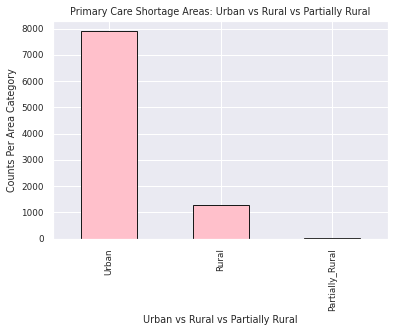

In [22]:
# Frequency Counting for Primary Care Shortage Areas: Rural vs Urban vs Partially Rural
la_facility_pcua['HPSA_RuralStatus'].value_counts().plot.bar(color = 'pink', edgecolor = 'k');
plt.title('Primary Care Shortage Areas: Urban vs Rural vs Partially Rural'); plt.xlabel('Urban vs Rural vs Partially Rural'); plt.ylabel('Counts Per Area Category');

### C) Impacts of HealthcareServices, Poverty, Ratio on PrimaryCare ShortageScore
### 1) Healthcare & Community Services on Shortage Score
#### top 2 Highest Shortages in Average:
i) Crime Reporting and Investigating_Public Safety 

ii) Crime Prevention and Support_Public Safety 
### Here, we see strong positive correlations between severity of shortage level and community development/safety

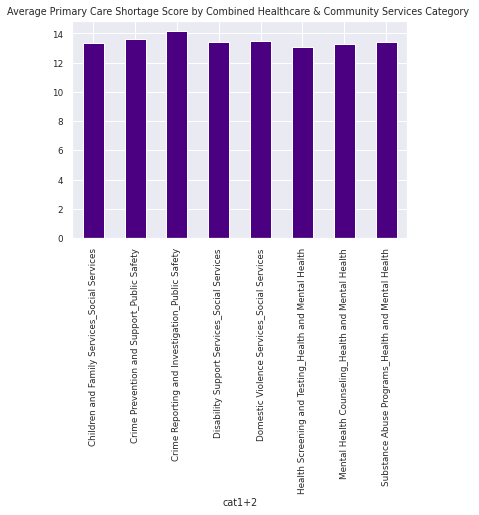

In [23]:
la_facility_pcua.groupby('cat1+2')['HPSA_Score'].mean().plot.bar(color = 'indigo');
plt.title('Average Primary Care Shortage Score by Combined Healthcare & Community Services Category ');

### 2) Services License Category on Shortage Score
#### top 5 Highest Primary Care Shortages:
i) Intermediate Care Facility 

ii) Acute Psychiatric Hospital

iii) Surgical Clinic

iv) Free Clinic

v) Psychiatric Health Clinic

#### top 3 Lowest Primary Care Shorages:

i) Icv/dev. Disabled

ii) General Acute Care Hospital

iii) Chemical Dep. Recovery Hospital

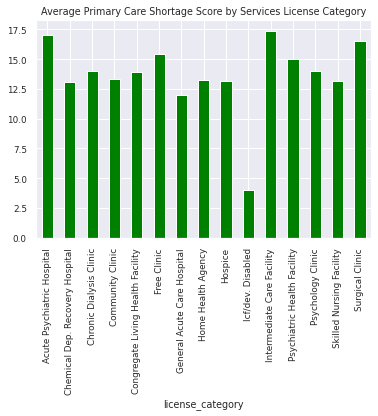

In [24]:
la_facility_pcua.groupby('license_category')['HPSA_Score'].mean().plot.bar(color = 'green');
plt.title('Average Primary Care Shortage Score by Services License Category');

### 3) Needbase (Geographic vs Geographic(High Needs) vs Population) on Shortage Sccore
#### Highest Primary Care Shortage by descending order
i) Geographic (High Needs)

ii) Geographic 

iii) Population

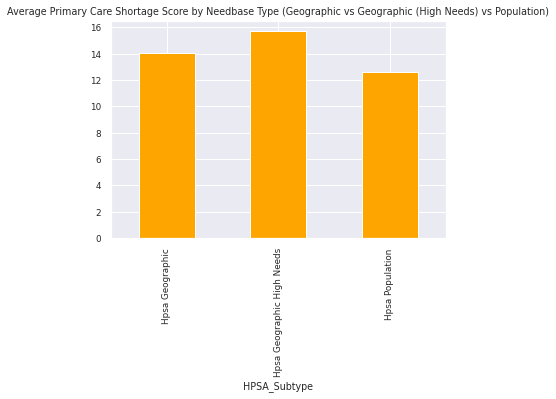

In [25]:
la_facility_pcua.groupby('HPSA_Subtype')['HPSA_Score'].mean().plot.bar(color = 'orange');
plt.title('Average Primary Care Shortage Score by Needbase Type (Geographic vs Geographic (High Needs) vs Population)');

### 4) Average Primary Care Shortage Score by Poverty Percentage Level


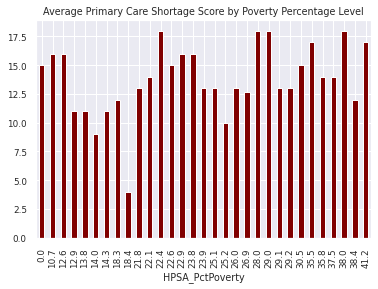

In [26]:
la_facility_pcua.groupby('HPSA_PctPoverty')['HPSA_Score'].mean().plot.bar(color = 'maroon');
plt.title('Average Primary Care Shortage Score by Poverty Percentage Level');

### 5) Average Shortage Ratio by Poverty Level
Except for two situations, the majority has very low HPSA Ratio

#### which means most areas have High Severity of Primary Care Shortage 
#### HPSA_Ratio: Lower Value -> higher shortage

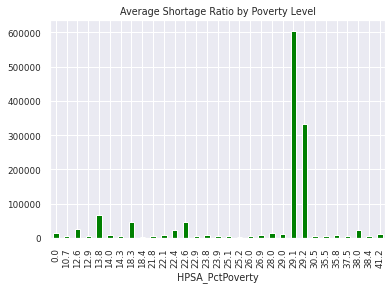

In [27]:
la_facility_pcua.groupby('HPSA_PctPoverty')['HPSA_Ratio'].mean().plot.bar(color = 'green');
plt.title('Average Shortage Ratio by Poverty Level');

### 6) Average Primary Care Shortage Score by Poverty Level Under 100%PovertyThreshold

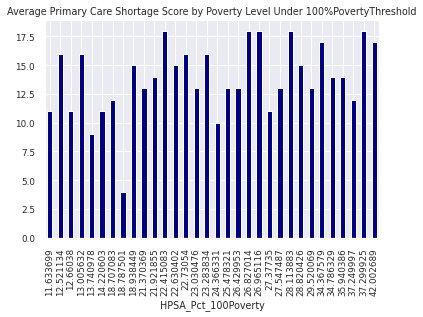

In [28]:
la_facility_pcua.groupby('HPSA_Pct_100Poverty')['HPSA_Score'].mean().plot.bar(color = 'navy');
plt.title('Average Primary Care Shortage Score by Poverty Level Under 100%PovertyThreshold');

### 7) Average Primary Care Shortage Score by Poverty Level Under 200%PovertyThreshold

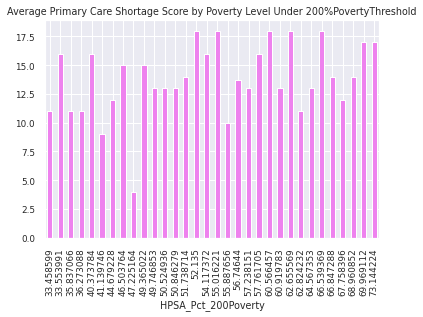

In [29]:
la_facility_pcua.groupby('HPSA_Pct_200Poverty')['HPSA_Score'].mean().plot.bar(color = 'violet');
plt.title('Average Primary Care Shortage Score by Poverty Level Under 200%PovertyThreshold');